 list of cities available
'Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram','Visakhapatnam'

## CHOOSE A CITY FROM THE ABOVE LIST 

In [1]:
City = 'Delhi'

#### RUN ALL THE CELLS BELOW TO VISUALIZE AND VIEW THE PREDICTED AQI FOR THE SELECTED CITY

In [2]:
import csv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [3]:

city_day = pd.read_csv('city_day.csv')
city_day

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
city_day.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
mice_imputer = IterativeImputer()
city_day = city_day.copy(deep=True)

columns_to_impute = ['PM2.5', 'PM10', 'NO', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'NO2']
city_day[columns_to_impute] = mice_imputer.fit_transform(city_day[columns_to_impute])




In [6]:
city_day.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [7]:
import numpy as np

# Define the AQI categories and their corresponding ranges
aqi_categories = [
    (0, 50, 'Good'),
    (51, 100, 'Satisfactory'),
    (101, 200, 'Moderate'),
    (201, 300, 'Poor'),
    (301, 400, 'Very Poor'),
    (401, 500, 'Severe')
]

# Initialize the AQI_Bucket column with NaN or an empty string
city_day['AQI_Bucket'] = np.nan

# Apply the categories
for lower, upper, category in aqi_categories:
    city_day['AQI_Bucket'] = np.where(
        (city_day['AQI'] >= lower) & (city_day['AQI'] <= upper),
        category,
        city_day['AQI_Bucket']
    )

city_day


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,70.247384,145.149912,0.92,18.22,17.15,17.107710,0.92,27.64,133.36,0.000000,0.020000,0.000000,187.848472,Moderate
1,Ahmedabad,2015-01-02,51.705822,111.013449,0.97,15.69,16.46,13.169056,0.97,24.55,34.06,3.680000,5.500000,3.770000,135.164770,Moderate
2,Ahmedabad,2015-01-03,38.182483,64.496013,17.40,19.30,29.70,64.154174,17.40,29.07,30.70,6.800000,16.400000,2.250000,298.011990,Poor
3,Ahmedabad,2015-01-04,51.048814,106.320601,1.70,18.48,17.97,26.156670,1.70,18.59,36.08,4.430000,10.140000,1.000000,140.462721,Moderate
4,Ahmedabad,2015-01-05,36.711762,61.328483,22.10,21.42,37.76,72.805995,22.10,39.33,39.31,7.010000,18.890000,2.780000,357.723688,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.000000,0.000000,0.000000,54.000000,Satisfactory


In [8]:
def mergeColumns(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data['BTX'] = data['Benzene'] + data['Toluene'] + data['Xylene']
    data.drop(['Benzene','Toluene','Xylene'], axis=1)
    data['Particulate_Matter'] = data['PM2.5'] + data['PM10']
    return data

def subsetColumns(data):
    pollutants = ['Particulate_Matter', 'NO2', 'CO','SO2', 'O3', 'BTX']
    columns =  ['Date', 'City', 'AQI', 'AQI_Bucket'] + pollutants
    data = data[columns]
    return data, pollutants
def handleMissingValues(data):
   # missing_values = getMissingValues(data)
    newCityData = mergeColumns(data)
    newCityData, pollutants = subsetColumns(newCityData)
    return newCityData, pollutants

newCityData, newColumns = handleMissingValues(city_day)
newCityData

,Date,City,AQI,AQI_Bucket,Particulate_Matter,NO2,CO,SO2,O3,BTX
0,2015-01-01,Ahmedabad,187.848472,Moderate,215.397296,18.22,0.92,27.64,133.36,0.020000
1,2015-01-02,Ahmedabad,135.164770,Moderate,162.719271,15.69,0.97,24.55,34.06,12.950000
2,2015-01-03,Ahmedabad,298.011990,Poor,102.678497,19.30,17.40,29.07,30.70,25.450000
3,2015-01-04,Ahmedabad,140.462721,Moderate,157.369414,18.48,1.70,18.59,36.08,15.570000
4,2015-01-05,Ahmedabad,357.723688,Very Poor,98.040245,21.42,22.10,39.33,39.31,28.680000
...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,Visakhapatnam,41.000000,Good,65.960000,25.06,0.47,8.55,23.30,15.040000
29527,2020-06-28,Visakhapatnam,70.000000,Satisfactory,98.470000,26.06,0.52,12.72,30.14,3.330000
29528,2020-06-29,Visakhapatnam,68.000000,Satisfactory,88.640000,29.53,0.48,8.42,30.96,0.020000
29529,2020-06-30,Visakhapatnam,54.000000,Satisfactory,66.610000,29.26,0.52,9.84,28.30,0.000000


In [9]:
import pandas as pd
import numpy as np

# Assuming newCityData is already defined and preprocessed

def min_max_normalize(data, column):
    min_val = data[column].min()
    max_val = data[column].max()
    data[f'{column}_new'] = (data[column] - min_val) / (max_val - min_val)
    return data

# List of columns to normalize
columns_to_normalize = ['Particulate_Matter', 'NO2', 'CO', 'SO2', 'O3', 'BTX']

# Apply normalization to each column
for col in columns_to_normalize:
    newCityData = min_max_normalize(newCityData, col)

# Select relevant columns
selected_columns = ['City', 'Date', 'AQI', 'AQI_Bucket'] + [f'{col}_new' for col in columns_to_normalize]
newCityData = newCityData[selected_columns]


# Another DataFrame nCityData with the same columns is not needed since newCityData already has the required columns
newCityData.to_csv('nCityData.csv', index=False)


In [10]:
pollutant = ['Particulate_Matter_new','NO2_new','CO_new','SO2_new','O3_new','BTX_new']

In [11]:
newCityData

,City,Date,AQI,AQI_Bucket,Particulate_Matter_new,NO2_new,CO_new,SO2_new,O3_new,BTX_new
0,Ahmedabad,2015-01-01,187.848472,Moderate,0.398291,0.058823,0.083663,0.162823,0.570093,0.081126
1,Ahmedabad,2015-01-02,135.164770,Moderate,0.382165,0.051901,0.083925,0.147260,0.226846,0.092389
2,Ahmedabad,2015-01-03,298.011990,Poor,0.363785,0.061778,0.170010,0.170025,0.215231,0.103277
3,Ahmedabad,2015-01-04,140.462721,Moderate,0.380527,0.059535,0.087749,0.117242,0.233828,0.094671
4,Ahmedabad,2015-01-05,357.723688,Very Poor,0.362365,0.067579,0.194635,0.221700,0.244993,0.106090
...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,41.000000,Good,0.352544,0.077538,0.081305,0.066675,0.189652,0.094209
29527,Visakhapatnam,2020-06-28,70.000000,Satisfactory,0.362497,0.080274,0.081567,0.087677,0.213296,0.084009
29528,Visakhapatnam,2020-06-29,68.000000,Satisfactory,0.359487,0.089768,0.081357,0.066020,0.216130,0.081126
29529,Visakhapatnam,2020-06-30,54.000000,Satisfactory,0.352743,0.089029,0.081567,0.073172,0.206935,0.081109


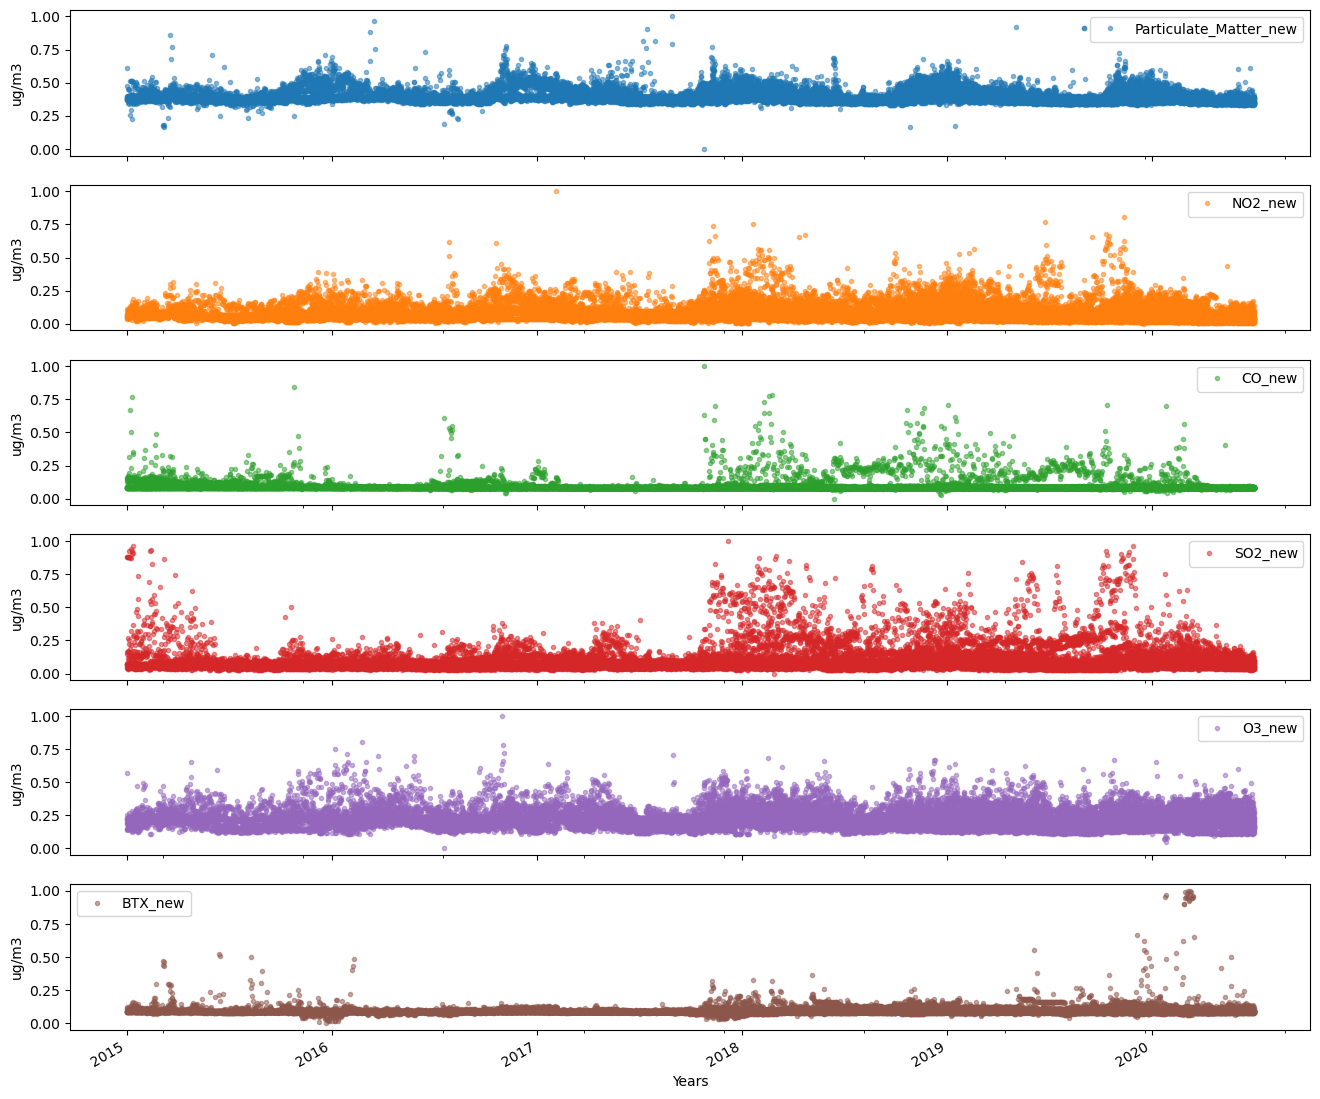

In [12]:
def visualisepollutants(udata, column):
    data = udata.copy()
    data.set_index('Date',inplace=True)
            
    axes = data[column].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 15), subplots=True)
    for ax in axes:
        ax.set_xlabel('Years')
        ax.set_ylabel('ug/m3')
visualisepollutants(newCityData, pollutant)

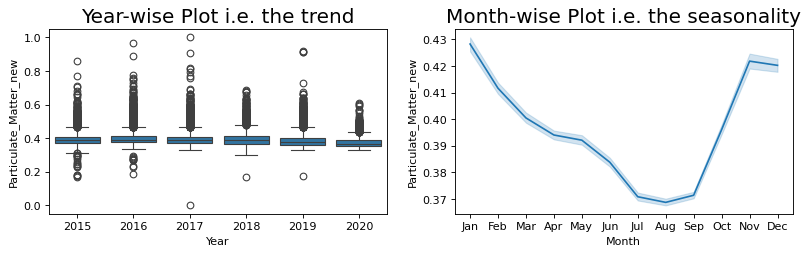

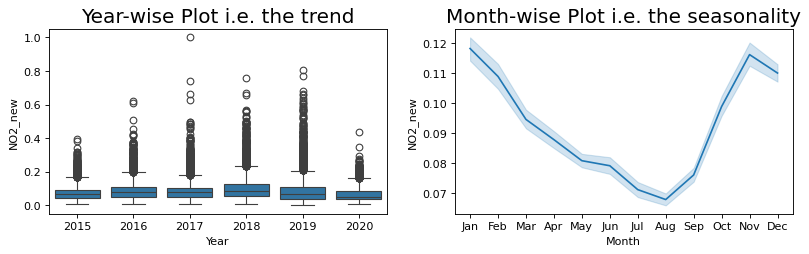

In [13]:
def trend_plot(nCityData, value):
    data = nCityData.copy()
    data['Year'] = [d.year for d in data.Date]
    data['Month'] = [d.strftime('%b') for d in data.Date]
    years = data['Year'].unique()
    fig, axes = plt.subplots(1, 2, figsize=(12,3), dpi= 80)
    sns.boxplot(x='Year', y=value, data=data, ax=axes[0])
    sns.lineplot(x='Month', y=value, data=data.loc[~data.Year.isin([2015, 2020]), :])
    
    axes[0].set_title('Year-wise Plot i.e. the trend', fontsize=18); 
    axes[1].set_title('Month-wise Plot i.e. the seasonality', fontsize=18)
    plt.show()
value='Particulate_Matter_new'
trend_plot(newCityData,value)
value='NO2_new'
trend_plot(newCityData,value)

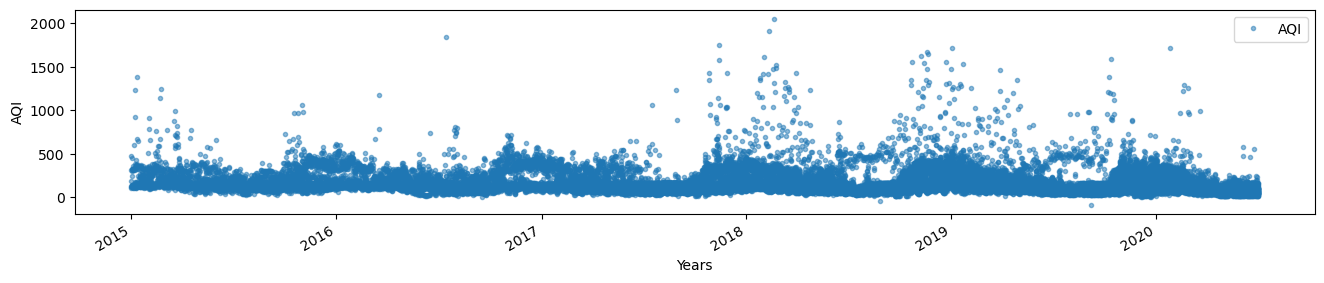

In [14]:
def visualiseAQI(udata, column):
    data = udata.copy()
    data.set_index('Date',inplace=True)
            
    axes = data[column].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 3), subplots=True)
    for ax in axes:
        ax.set_xlabel('Years')
        ax.set_ylabel('AQI')
visualiseAQI(newCityData, ['AQI'])

In [15]:

cities = ['Mumbai', 'Shillong', 'Lucknow', 'Delhi', 'Visakhapatnam', 'Patna', 'Bhopal']

# Filter newCityData based on date
somecityday = newCityData[newCityData['Date'] >= '2015-01-01']



# Filter AQI data for specific cities
AQI = somecityday[somecityday['City'].isin(cities)][['Date', 'City', 'AQI', 'AQI_Bucket']]

# Display the resulting DataFrame
print(AQI)


            Date           City       AQI    AQI_Bucket
6303  2019-09-17         Bhopal  78.49573  Satisfactory
6304  2019-09-18         Bhopal  89.00000  Satisfactory
6305  2019-09-19         Bhopal  77.00000  Satisfactory
6306  2019-09-20         Bhopal  76.00000  Satisfactory
6307  2019-09-21         Bhopal  82.00000  Satisfactory
...          ...            ...       ...           ...
29526 2020-06-27  Visakhapatnam  41.00000          Good
29527 2020-06-28  Visakhapatnam  70.00000  Satisfactory
29528 2020-06-29  Visakhapatnam  68.00000  Satisfactory
29529 2020-06-30  Visakhapatnam  54.00000  Satisfactory
29530 2020-07-01  Visakhapatnam  50.00000          Good

[9946 rows x 4 columns]


In [16]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')

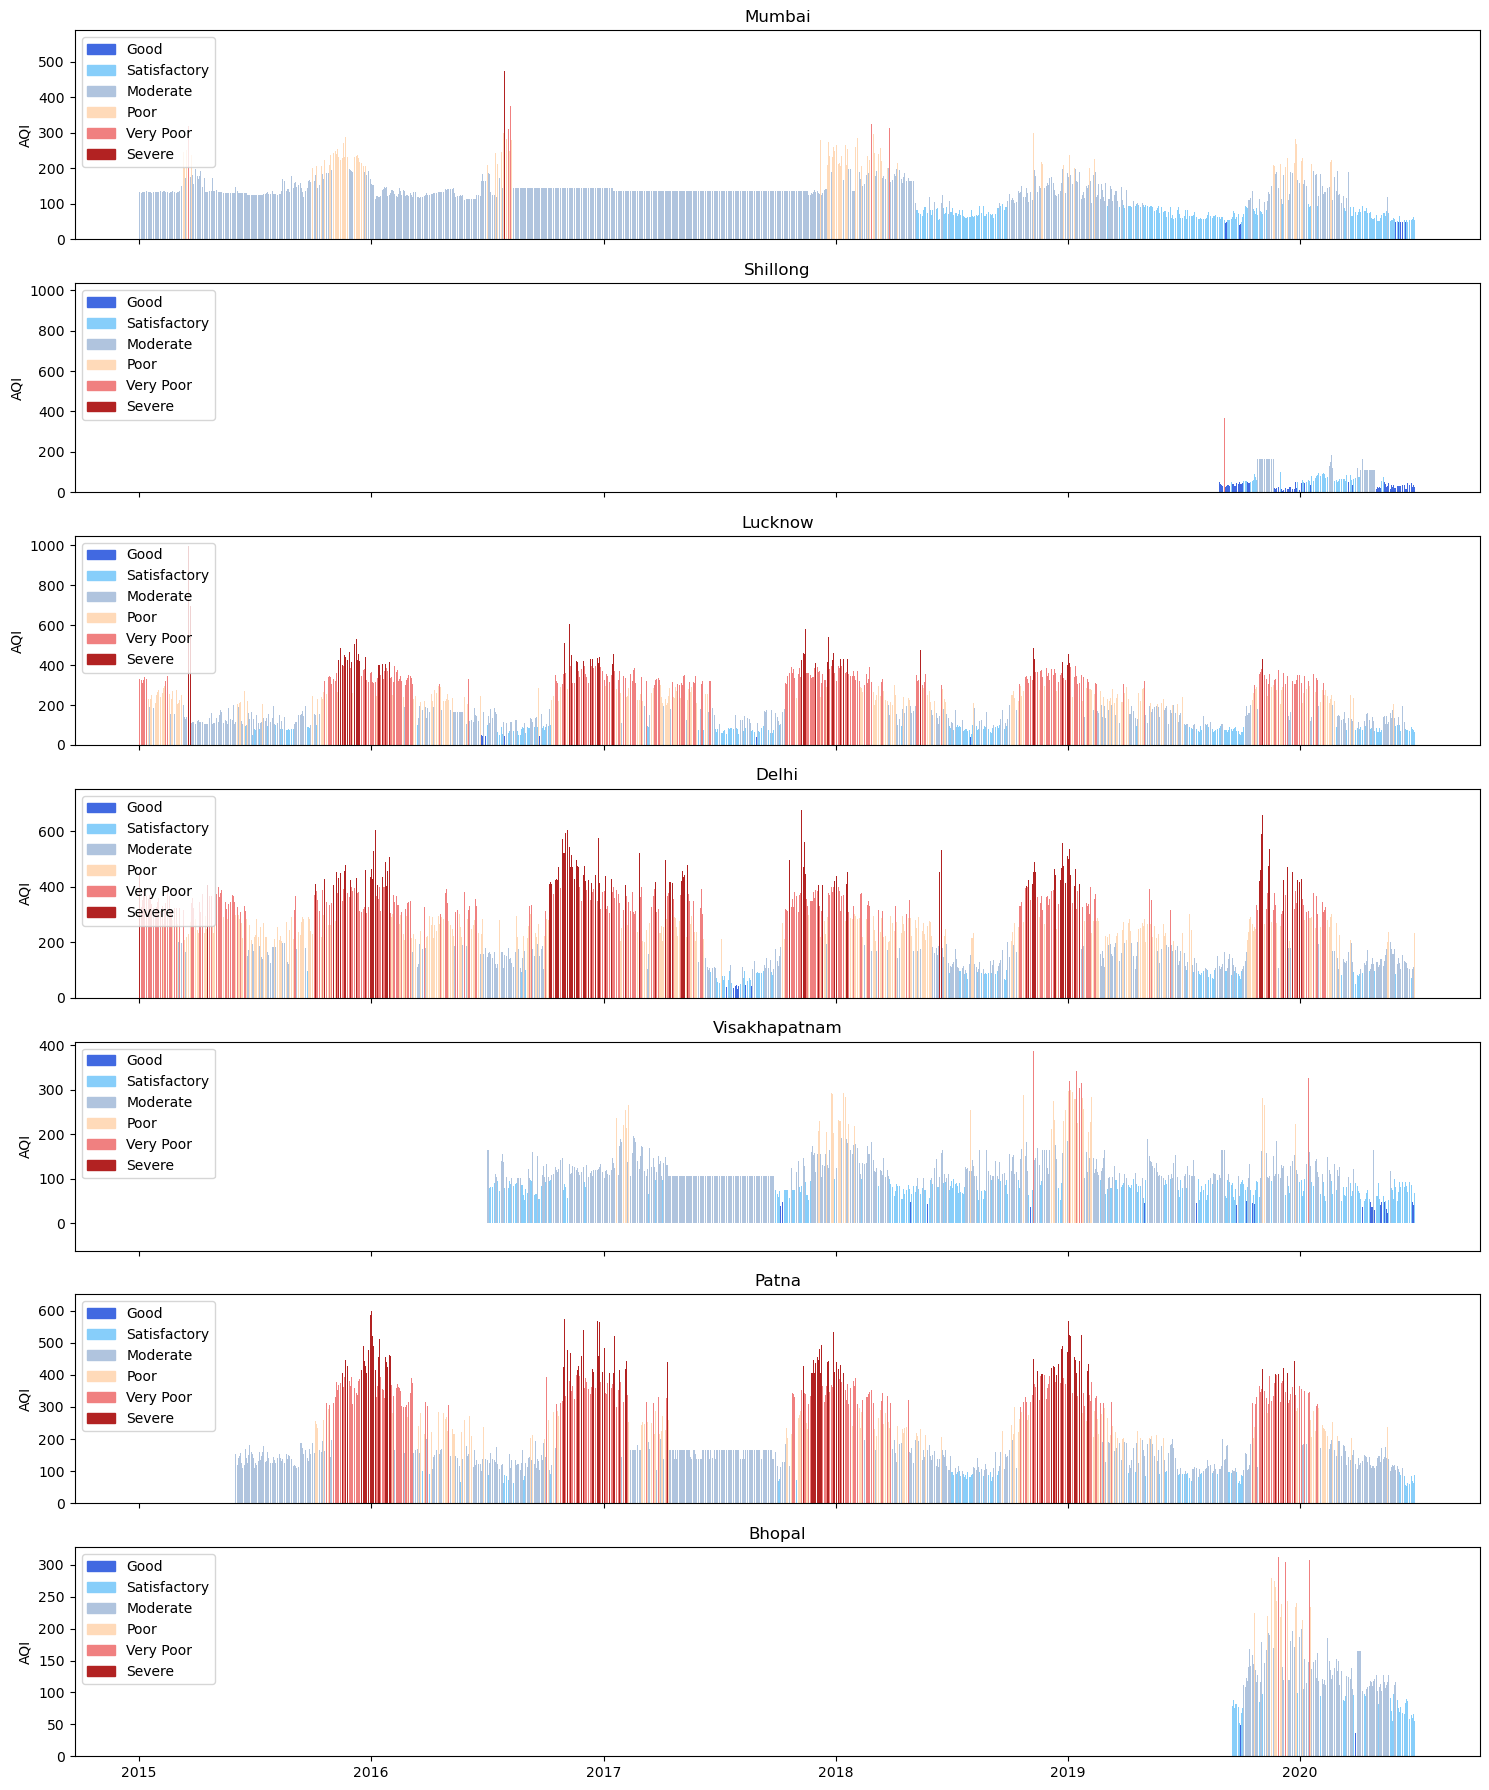

In [17]:
import matplotlib.pyplot as plt

def get_color_bar(values):
    colors = []
    for val in values:
        if val < 50:
            colors.append('royalblue')
        elif val < 101:
            colors.append('lightskyblue')
        elif val < 201:
            colors.append('lightsteelblue')
        elif val < 301:
            colors.append('peachpuff')
        elif val < 401:
            colors.append('lightcoral')
        else:
            colors.append('firebrick')
    return colors

def plot_city(ax, city_name, data):
    colors = get_color_bar(data)
    ax.bar(data.index, data, color=colors, width=0.75)
    ax.set_title(city_name)
    ax.set_ylabel('AQI')
    ax.legend(handles=handles, labels=labels, loc='upper left')

# Assume AQI_pivot is already defined as your pivoted DataFrame

cities = ['Mumbai', 'Shillong', 'Lucknow', 'Delhi', 'Visakhapatnam', 'Patna', 'Bhopal']
colors = {'Good':'royalblue', 'Satisfactory':'lightskyblue', 'Moderate':'lightsteelblue', 'Poor':'peachpuff', 'Very Poor':'lightcoral', 'Severe':'firebrick'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

fig, axes = plt.subplots(len(cities), 1, sharex='col', sharey='row', figsize=(15, 18))

for ax, city in zip(axes, cities):
    plot_city(ax, city, AQI_pivot[city])

plt.tight_layout()
plt.show()


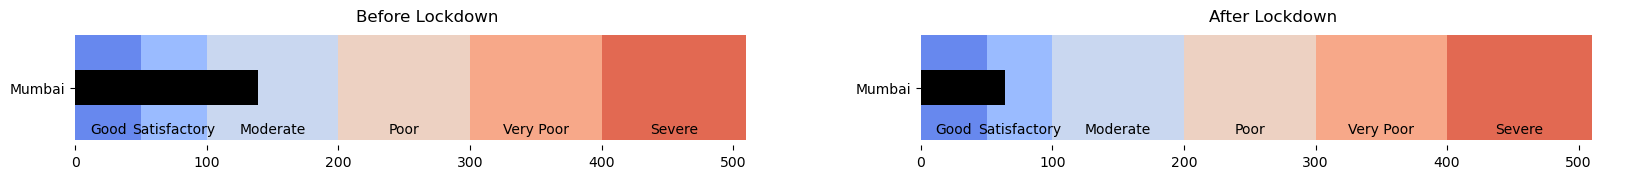

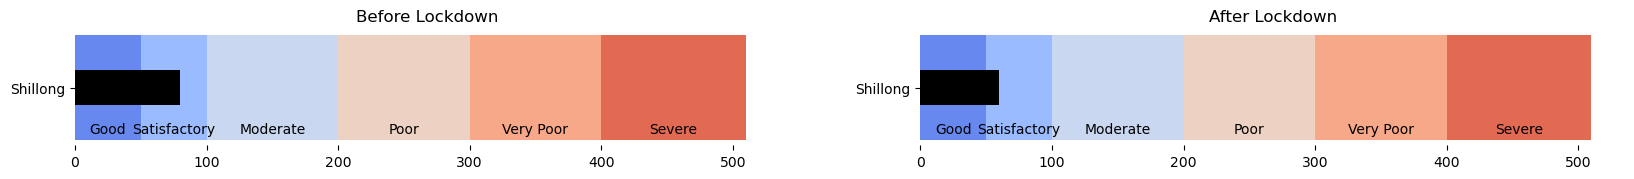

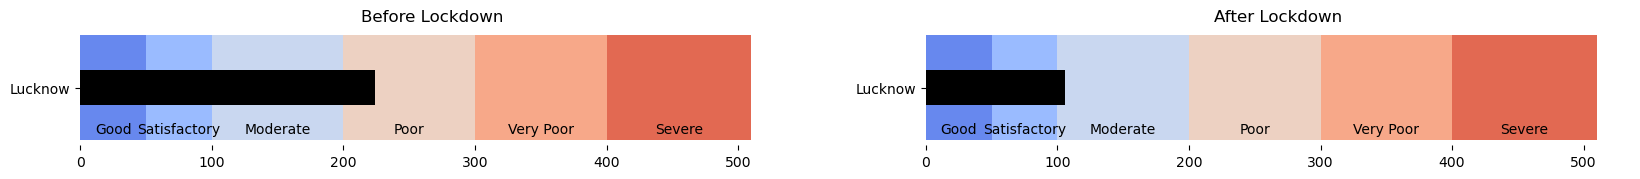

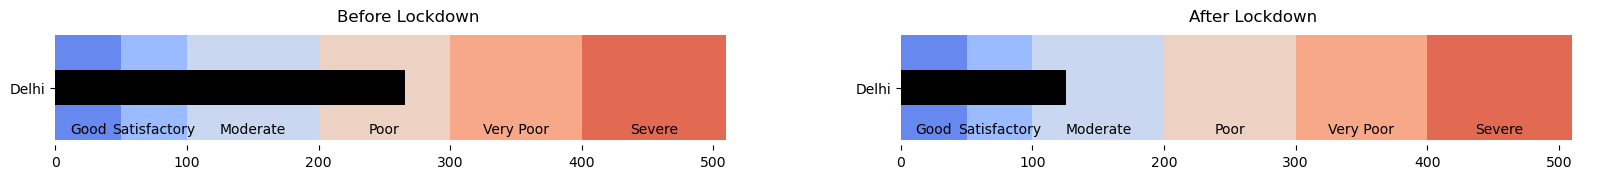

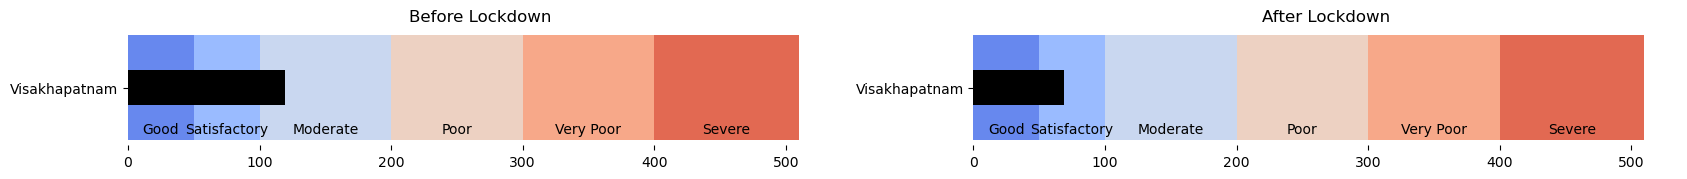

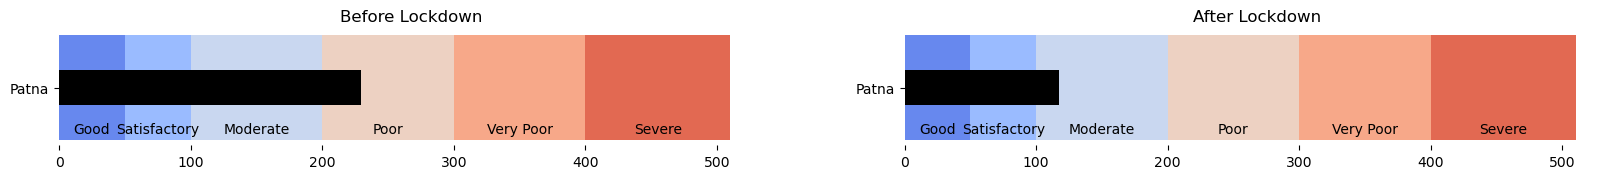

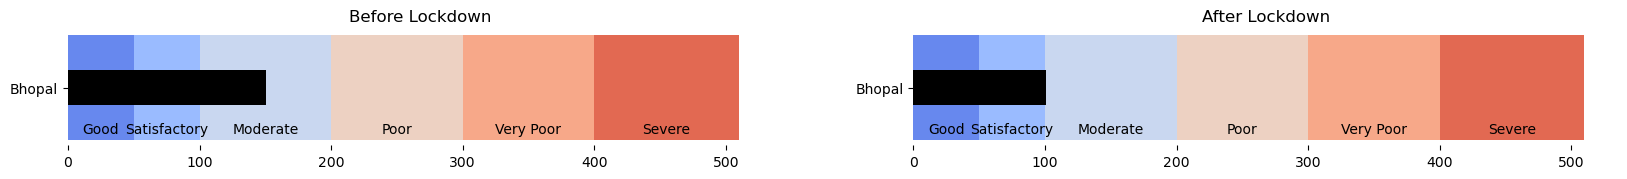

In [18]:
def plot_aqi_comparison(city, AQI_beforeLockdown, AQI_afterLockdown):
    aqi_before = AQI_beforeLockdown[city].mean()
    aqi_after = AQI_afterLockdown[city].mean()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 1.5))
    
    for ax, aqi, title in zip([ax1, ax2], [aqi_before, aqi_after], ['Before Lockdown', 'After Lockdown']):
        ax.set_yticks([1])
        ax.set_yticklabels([city])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        
        prev_limit = 0
        for idx, lim in enumerate(limits):
            ax.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
            prev_limit = lim
        
        ax.barh([1], aqi, color='black', height=5)
        ax.set_title(title)
        
    labels = ["Good", "Satisfactory", "Moderate", "Poor", 'Very Poor', 'Severe']
    for rect, label in zip(ax1.patches, labels):
        ax1.text(rect.get_x() + rect.get_width() / 2, -rect.get_height() * 0.4, label,
                 ha='center', va='bottom', color='black')
        ax2.text(rect.get_x() + rect.get_width() / 2, -rect.get_height() * 0.4, label,
                 ha='center', va='bottom', color='black')

# Setup
AQI_beforeLockdown = AQI_pivot['2015-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-07-01']
limits = [50, 100, 200, 300, 400, 510]
palette = sns.color_palette("coolwarm", len(limits))

# Plot for each city
for city in cities:
    plot_aqi_comparison(city, AQI_beforeLockdown, AQI_afterLockdown)

In [19]:
newCityData["City"].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [20]:
City_data = newCityData[newCityData['City']==City]
City_data.set_index('Date',inplace=True, drop = False)

In [21]:
start_date = City_data['Date'].min()
end_date = City_data['Date'].max()

In [22]:
val = 'AQI'
final_data = pd.DataFrame(index=np.arange(start_date,end_date,dtype='datetime64[D]'), columns = [val])
final_data[val] = City_data[val]
final_data=final_data.astype('float64')
final_data[val] = final_data[val].fillna(final_data[val].mean(axis=0))

In [23]:
seasonal_data = final_data
seasonal_data = seasonal_data.resample(rule='MS').mean()

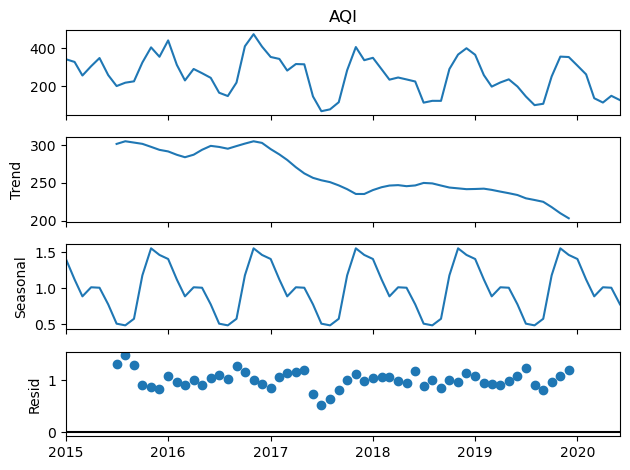

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
City_AQI = seasonal_data[val]
result = seasonal_decompose(City_AQI, model='multiplicative')
result.plot();

In [25]:
import pmdarima as pm

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima;

In [27]:
auto_arima(y=City_AQI,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12)

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True)

In [28]:
split = int(len(City_AQI)*0.8)
train = City_AQI[:split] 
test = City_AQI[split:]

In [29]:
model=SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59250D+00    |proj g|=  5.23065D-02

At iterate    5    f=  5.56221D+00    |proj g|=  4.85666D-02

At iterate   10    f=  5.54943D+00    |proj g|=  2.50813D-02

At iterate   15    f=  5.47864D+00    |proj g|=  6.06627D-02

At iterate   20    f=  5.44927D+00    |proj g|=  7.11259D-03

At iterate   25    f=  5.39835D+00    |proj g|=  4.99002D-02

At iterate   30    f=  5.38584D+00    |proj g|=  4.92473D-04

At iterate   35    f=  5.38528D+00    |proj g|=  1.97077D-03
  ys=-2.689E-04  -gs= 1.419E-04 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  AQI   No. Observations:                   52
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -280.034
Date:                              Sun, 30 Jun 2024   AIC                            568.067
Time:                                      23:13:43   BIC                            575.872
Sample:                                  01-01-2015   HQIC                           571.060
                                       - 04-01-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8751      0.074     11.800      0.000       0.730       1.020
ar.S.L12       0.9994      0.053     18.937      0.000       0.896       1.103
ma.S.L12      -0.9355      2.740     -0.341      0.733      -6.305       4.434
sigma2      1489.5543   4019.654      0.371      0.711   -6388.822    9367.931
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 0.06
Prob(Q):                              0.61   Prob(JB):                         0.97
Heteroskedasticity (H):               0.81   Skew:                             0.02
Prob(H) (two-sided):                  0.67   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
predictions = results.predict(start=split, end=len(City_AQI), typ='levels').rename('Predictions')

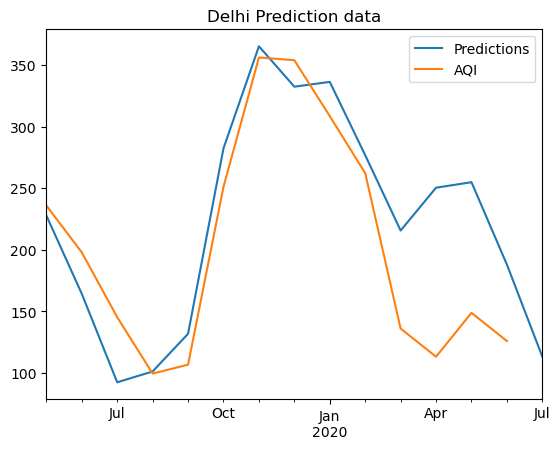

In [31]:

predictions.plot(legend=True)
test.plot(legend=True,title=f"{City} Prediction data");

In [32]:
print(test)

2019-05-01    235.838710
2019-06-01    197.766667
2019-07-01    145.096774
2019-08-01     99.290323
2019-09-01    106.533333
2019-10-01    251.000000
2019-11-01    356.100000
2019-12-01    353.903226
2020-01-01    308.451613
2020-02-01    262.137931
2020-03-01    135.838710
2020-04-01    113.000000
2020-05-01    148.645161
2020-06-01    125.733333
Freq: MS, Name: AQI, dtype: float64


In [33]:
print(predictions[:-1])

2019-05-01    227.744272
2019-06-01    164.134642
2019-07-01     92.225437
2019-08-01    101.008418
2019-09-01    131.623915
2019-10-01    282.260540
2019-11-01    365.212779
2019-12-01    332.390747
2020-01-01    336.278486
2020-02-01    276.727013
2020-03-01    215.509155
2020-04-01    250.320526
2020-05-01    254.780344
2020-06-01    187.814336
Freq: MS, Name: Predictions, dtype: float64


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error,mean_poisson_deviance,mean_gamma_deviance
import math
print('Mean AQI:',test.mean())
mse = mean_squared_error(test, predictions[:-1])
print('MSE: '+str(mse))
mae = mean_absolute_error(test, predictions[:-1])
print('MAE: '+str(mae))
r2score=r2_score(test, predictions[:-1])
print('r2score: '+str(r2score))
explainedVariance_score=explained_variance_score(test, predictions[:-1])
print('explainedVariance_score: '+str(explainedVariance_score))
me=max_error(test, predictions[:-1])
print('me: '+str(me))


Mean AQI: 202.80969860691772
MSE: 3389.8401540136315
MAE: 43.636813354576574
r2score: 0.5653554206629383
explainedVariance_score: 0.6591715964514224
me: 137.32052589819097


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59250D+00    |proj g|=  5.23065D-02

At iterate    5    f=  5.56221D+00    |proj g|=  4.85666D-02

At iterate   10    f=  5.54943D+00    |proj g|=  2.50813D-02

At iterate   15    f=  5.47864D+00    |proj g|=  6.06627D-02

At iterate   20    f=  5.44927D+00    |proj g|=  7.11259D-03

At iterate   25    f=  5.39835D+00    |proj g|=  4.99002D-02

At iterate   30    f=  5.38584D+00    |proj g|=  4.92473D-04

At iterate   35    f=  5.38528D+00    |proj g|=  1.97077D-03
  ys=-2.689E-04  -gs= 1.419E-04 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


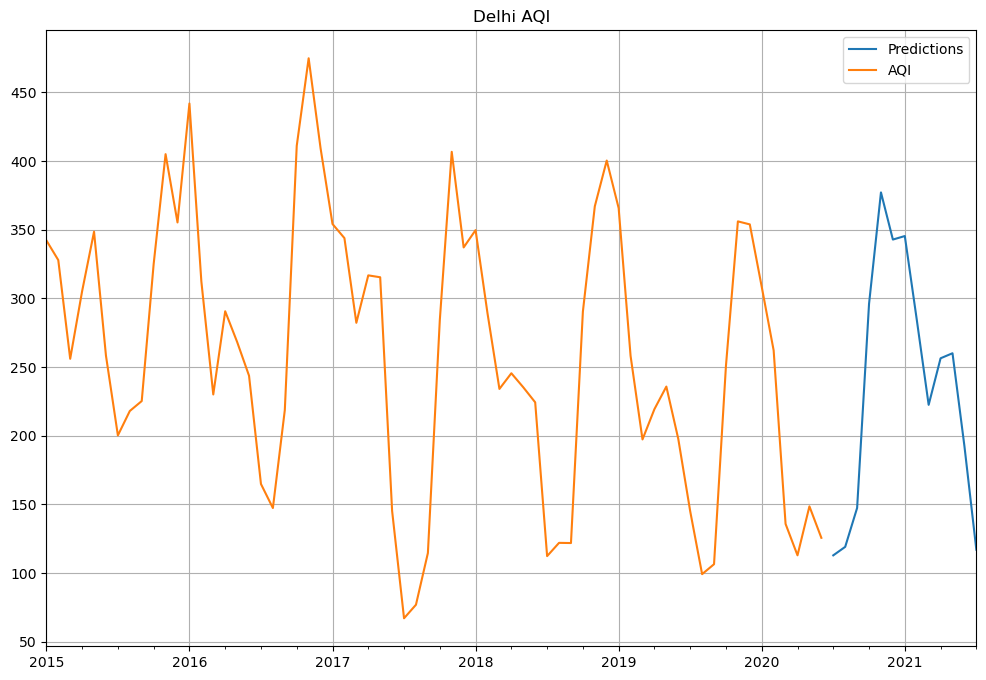

In [35]:
final_model = SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,1,12))
results = final_model.fit()
#Obtaining predicted values:
predictions = results.predict(start=len(City_AQI), end=len(City_AQI) + 12, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
City_AQI.plot(legend=True,figsize=(12,8),grid=True,title=f"{City} AQI");